# Part 1 (Paper is linked [here](https://core.ac.uk/download/pdf/212982419.pdf))
## Background info on fantasy football
- In fantasy football, each manager (person playing in a league) drafts a team of NFL football players to be on their roster. 
    - This roster scores "fantasy points" every week based on how well the players on that roster perform.
    - Each roster is made up of a starting lineup and a bench, similar to how an NFL team works.   

* Performance metrics (yards, catches, touchdowns, etc.) for each type of player (quarterback, wide receiver, etc.) are converted into one common metric (fantasy points) so that each fantasy team's performance can be displayed using a single metric.

    - For example, the standard performance -> points conversion for quarterback scoring is as follows:\
    Points = (Yards Thrown) * 0.04 + (touchdowns (TDs) scored by throwing) * 4 + (Yards Run) * 0.1 + (TDs scored by running) * 6 - (Interceptions) * 2

    * So a quarterback who threw for 200 yards and 2TDs would receive `200 * 0.04 + 2 * 4 = 16` fantasy points\
    While a quarterback who threw for 300 yards and 4TDs would receive `300 * 0.04 + 4 * 4 = 28` fantasy points (better performance = more points)

- Fantasy football is typically played in a weekly, head-to-head format. 
    - Managers face off in "matchups" each week against another manager (again, similar to the NFL). At the end of a given week's games, the manager whose starting lineup scored the most fantasy points wins the matchup.

* Many sites offer "projections" of how many fantasy points a given player is expected to score in a given week, which can help managers select which players to put into their starting lineups. 
- A key problem for many managers/sites is determining how accurate these projections are, since selecting the right players to start can either win or lose a weekly matchup for a manager

## Section 1 
#### What question was the author trying to answer?
These authors wanted to evaluate how well the proprietary model they were investigating could project the number of fantasy points scored by quarterbacks (QBs) and team defense/special teams units (D/STs), which are two different fantasy football position groups. They also wanted to determine if the model's projections of fantasy points improved over the course of the season, so they collected projection data for each week of the season.
#### Describe the data:
This data includes quarterback and team defense fantasy football projections by a proprietary model ([Advanced Sports Logic's "The Machine"](https://advancedsportslogic.com/nfl)) and how many fantasy points the players the model projected actually scored for each week of the 2012 NFL season. This dataset is comprised of 2 separate excel sheets, one that tracks quarterback fantasy projections/points and another that tracks team defense fantasy projections/points

#### What are the observations? How were they collected?
The observations are weeks of the fantasy football 'season'. The authors divided up the fantasy footbal season into a 5-week `preseason` phase where managers would be doing their fantasy footbal drafts, and a 16-week `NFL season` phase with **weekly** matchups. For each week in this 21-week time frame, the authors collected the model's fantasy point projections for the QBs and D/STs in the model. For each week of the `NFL season` phase, they also collected data on how many points each player actually scored.

All that would be involved in the data collection would be retrieving the model's projections **before** the start of the week's NFL games, and retrieving the fantasy points each player scored **after** the start of the week's NFL games.

#### What are the features?
The features are projected fantasy points scored and actual fantasy points scored (except for `preseason` phase data, which would only include data on the projected fantasy points). This discrepancy is because no regular season NFL football is being played during the `preseason` phase, so there are no fantasy points actually being scored.

The other key features were the position and name of the player being tracked (e.g. QB Tom Brady). This allowed the authors to determine if there were any outlier data points that might be skewing their assessment of the model's accuracy.
- One example of a situation where this might be relevant is a mid-season injury. 
- Let's say that QB `A` projects to score 18.0 fantasy points in a given week. In week 8, he gets injured and is replaced by QB `B` the following week
- The model uses QB `A`'s projections to project QB `B`'s fantasy points for week 9 (since QB `A` and QB `B` play for the same team, and thus the same offense)
- QB `B` is actually a much worse QB than QB `A`, however, and only scores 12 fantasy points
- The model then adjusts its projections to accomodate for this drop in performance, and does a good job of projecting QB `B` for the remainder of the season

In this case, what should the authors do with QB `B`'s week 9 projection? Is it a fair assumption that fantasy football managers wouldn't trust the site's projections for that week, or should they keep that data point in the model?

#### What other data or knowledge was used?
The team that each player played for, as well as a unique playerID. These were not used as features in this study, since the accuracy of the model's projections were assumed to be team- and player-agnostic. They could be useful, however, for identifying outliers, as in the situation above.

#### What's another question the author could have asked?
Is there a correlation between team defensive fantasy points scored and quarterback fantasy points scored? 
- In fantasy football, defenses are typically drafted on a team level. For example, I might play the `New England Patriots` D/ST
- If the authors had decided to ask this question, they could have matched up which D/STs matched the `Team` column for each quarterback
- Then, they could've used fantasy points scored to determine if there was a correlation between quarterback fantasy points scored and team defense fantasy points scored

In [7]:
# import packages and dataset
import pandas as pd

QB = pd.read_excel('../Data/Accuscore Evaluation.xlsx', sheet_name='QB Projections')
DST = pd.read_excel('../Data/Accuscore Evaluation.xlsx', sheet_name= 'DST Projections')

In [8]:
# How many unique observations (weeks) are there?
# 21, derived from 16 weeks of the NFL season, plus 5 weeks for preseason

# How many features are there?
# 4! There's projected fantasy points scored, actual fantasy points scored, position, and player

# Print out the dataset
display(QB.head())
display(DST.head())

# Helpful dataset notes
# ORDER = week of the NFL season
# Columns (2013-06-10, 2013-08-09, etc.) = projections at a given time point.
    # Projections beyond a given week of the NFL season would be meaningless, since the game the model was projecting would've already happened
    # Therefore, projections for any week after the game has already been played is a NaN in this dataset
# Actuals = actual fantasy points scored
# PLAYERID assigns a unique identifier to each PLAYER
# ID combines the information from ORDER with the PLAYERID data


,ORDER,1,ID,PLAYERID,PLAYER,TEAM,Actuals,2013-06-10 00:00:00,2013-08-09 00:00:00,2013-08-16 00:00:00,...,2013-10-25 00:00:00,2013-11-01 00:00:00,2013-11-08 00:00:00,2013-11-15 00:00:00,2013-11-22 00:00:00,2013-11-29 00:00:00,2013-12-06 00:00:00,2013-12-13 00:00:00,2013-12-20 00:00:00,Variation
0,1,2,1428-1,1428,Peyton Manning,DEN,18.42,13.6,14.1,14.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.064000
1,1,3,1575-1,1575,Matt Hasselbeck,TEN,1.72,11.5,3.5,1.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.165667
2,1,4,2330-1,2330,Tom Brady,NE,17.54,20.8,20.4,20.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.690667
3,1,5,2549-1,2549,Michael Vick,PHI,17.88,18.4,19.2,19.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.097667
4,1,6,2580-1,2580,Drew Brees,NO,21.56,21.2,20.1,19.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.320000


,ESPNID,PLAYER,TEAM,ORDER,Actuals,2013-06-10 00:00:00,2013-08-09 00:00:00,2013-08-16 00:00:00,2013-08-23 00:00:00,2013-08-30 00:00:00,...,2013-10-25 00:00:00,2013-11-01 00:00:00,2013-11-08 00:00:00,2013-11-15 00:00:00,2013-11-22 00:00:00,2013-11-29 00:00:00,2013-12-06 00:00:00,2013-12-13 00:00:00,2013-12-20 00:00:00,Variation
0,60001,Atlanta Falcons,ATL,1,9,9.7,9.7,9.9,10.2,10.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.072000
1,60002,Buffalo Bills,BUF,1,-2,12.8,11.6,11.6,11.9,12.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.223000
2,60003,Chicago Bears,CHI,1,13,17.9,18.2,19.4,18.8,17.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.633667
3,60004,Cincinnati Bengals,CIN,1,1,8.4,8.5,8.7,8.6,9.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.061667
4,60005,Cleveland Browns,CLE,1,29,4.2,7.1,6.9,7.1,7.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.413667


## Section 2
### Figure 1
#### How was it generated?
To express how well their proprietary model was projecting fantasy points scored, the authors created a `projection score` metric that ranged from 0 to 100, with 0 being a poor projection that was far away from the number of points scored, and 100 being a perfect projection. 

This figure examines the `projection score` that a score that was x% away from the actual number of fantasy points scored would be given.

In other words, the authors were trying to develop a way to grade how good their projections were, on a scale from 0 to 100.

They tested the grading system by feeding it fake data that was some % away from the actual fantasy points scored
- Let's say the actual number of points scored was 10. The authors would have fed 10, 10.5 (5% error), 11 (10% error), etc. into their grading system, and seen what came out
- They expected that a score of 5% error would be a 90, 10% error would be an 80, and so on. 

#### What are the axes?
The x-axis is the % error (the difference between actual fantasy points scored and projected points scored) and the y-axis is the `projection score`, from 0 to 100
#### What are the datapoints?
Each data point is an (x, y) pair of what score a projection with a given amount of error would receive using the authors' rating system
#### Why did the authors include this figure?
The authors included this figure to show how the first iteration of their `projection score` metric performed. They were unhappy that the model rated projections that were close to the actual number of points scored (within 5%, +/- 1 fantasy point per 20 fantasy points scored) as a 63.81/100 (which was too low). They then described a series of improvements that they made to the metric to help the `projection score` more closely match their expectations (with projections within 5% of the real value receiving scores in the 90s)

#### What can we conclude from this figure?
The first iteration of the authors' `projection score` metric resulted in low ratings of projections across the board. While increasing how far away from the actual value a projection was did result in a worse score (which makes sense in terms of evaluating a model's accuracy), even a projection with a 5% error only received a 63.8/100.

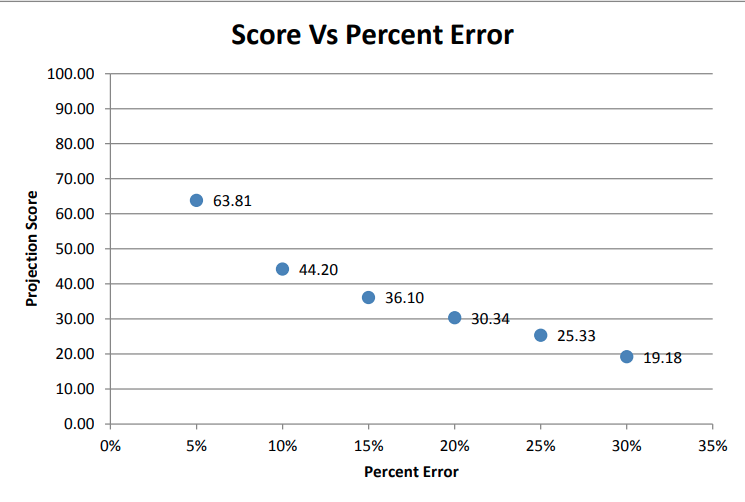

In [3]:
# Fig 1
from IPython.display import Image
display(Image('../figure1.png'))

### Figure 2
#### How was it generated?
This table was generated from all of the projected and actual fantasy points scored by quarterbacks over the entire NFL season. 
#### What are the axes?
The rows and columns of this table represent weeks of the NFL season or pre-season
#### What are the cells?
Each cell represents the correlation between the projection given at that point in time, and the actual points scored during that week of the season
#### Why did the authors include this figure?
The authors included this figure as a summary of how well their model projected fantasy points throughout the season, and to help them determine if the model's accuracy improved over the course of the season
#### What can we conclude from this figure?
Early- (Weeks 1-5) and mid-season (Weeks 6-10) projections do not significantly differ from preseason projections (Post Draft and Preseason Weeks 1-4) in terms of accuracy. Late season projections (Weeks 11-16) are significantly better than preseason projections for determining actual fantasy points scored.

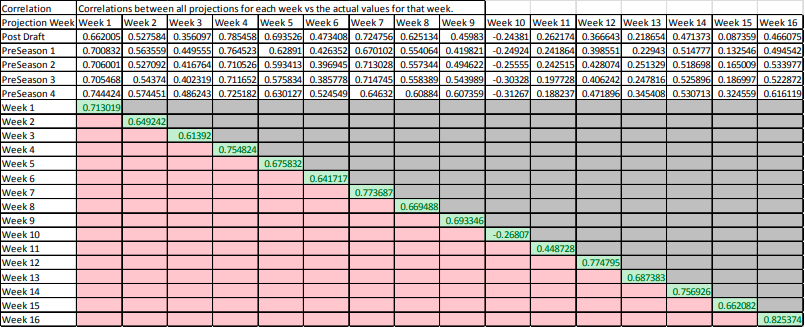

In [4]:
# Fig 2
display(Image('../figure2.png'))

### What figure would you add?
I would add a figure that graphs correlation over time for each week of the NFL season. For instance, the dataset includes all correlations for each week, all the way from Week 1 to Week 16 of the NFL season. The y-axis for this graph would be correlation coefficient, and the x-axis would be week of the NFL season. The datapoints would be the correlation coefficients for each position group (QB/DST) and week of the NFL Season.

For instance:
Week 1, the QB projection correlation was 0.713, the D/ST correlation was 0.442
Week 2, the QB projection correlation was 0.649, the D/ST correlation was -.549

This figure would demonstrate:
1. The accuracy of each position's projections over time
2. Whether one position had signficantly more accurate projections than the other (values)
3. Whether one position's projection accuracy improved significantly more than the other over the course of the season (slope)

It would also do so in a much neater way than the table shown in figure 2, which would increase the reader's comprehension of one of the main takeaways from the study (QB projections tend to be more accurate the D/ST projections using this model)

## Section 3
#### Data format
Since this is a .xlsx file, the delimeter for this data is a comma\
(It's more complicated than that because excel files are really zip files with some specific formatting).\
In short, it's an Excel spreadsheet

In [9]:
# QBs
print('Number of rows (QBs):', QB.shape[0])
print('Number of columns (QBs):', QB.shape[1])

print()

# DSTs
print('Number of rows: (DSTs):', DST.shape[0])
print('Number of columns: (DSTs):', DST.shape[1])

Number of rows (QBs): 587
Number of columns (QBs): 29

Number of rows: (DSTs): 480
Number of columns: (DSTs): 27


# Part 2
#### Data can be downloaded [here](https://digital.wpi.edu/concern/student_works/5712m8080?locale=en)
1. Scroll to the bottom of the page
2. Download the ASLMQP.zip file into a `Data` directory inside of your parent directory
3. Unzip it into the `Data` directory!

The sheet you're looking for is `Accuscore Evaluation.xlsx`

In [10]:
# import packages and dataset
import pandas as pd

# These were imported for each fantasy football position type (QB or DST)
QB = pd.read_excel('../Data/Accuscore Evaluation.xlsx', sheet_name='QB Projections')
DST = pd.read_excel('../Data/Accuscore Evaluation.xlsx', sheet_name= 'DST Projections')

# Data Cleaning

In [11]:
# Remove duplicate columns (PLAYERID/ESPNID is simply an alias for PLAYER)
QB = QB.drop(['PLAYERID', 1], axis=1)
# Since defenses are played per team, as long as we have the TEAM data, we know what the name of the player is
DST = DST.drop(['ESPNID', 'PLAYER'], axis=1)
# Rename ORDER column to WEEK for clarity (since order describes the week of the NFL season)
QB = QB.rename(columns={'ORDER':'WEEK'})
DST = DST.rename(columns={'ORDER':'WEEK'})


# Remove Ben Roethelisberger's and Andrew Luck's bye weeks (Week 4), since the authors forgot to
ben_bye = ((QB['WEEK'] == 4) & (QB['PLAYER'] == 'Ben Roethlisberger')).astype(int).idxmax()
luck_bye = ((QB['WEEK'] == 4) & (QB['PLAYER'] == 'Andrew Luck')).astype(int).idxmax()
QB = QB.drop([ben_bye, luck_bye], axis=0)


In [12]:
# Print out the shape of each dataset
print(QB.shape)
print(DST.shape)

(585, 27)
(480, 25)


#### How does the shape of each dataset relate to the number of features and observations in that dataset?
- QBs
    - There are 32 teams in the NFL
    - There were 585 datapoints for projections on 39 different quarterbacks across the 16-week 2012 season (15 games played for each player + 1 bye week)
    - The reason there are more than 32 quarterbacks is because multiple teams had two or more quarterbacks that started at least 1 game across the season
    - Thus, there are 39*15 = 585 rows in this dataset
- DSTs
    - There are 32 teams, and thus 32 team defenses, in the NFL
    - There are 480 datapoints for projections on these 32 team defeneses across the 16-week 2013 season
    - This is because each team gets a __bye week__ where they don't play. 
    - For defenses, these weeks were excluded from the dataset. Therefore, there are 32 teams * 15 weeks = 480 datapoints
- Features
    - There are 21 projections (16 in-season projections + 5 preseason ones) + a 'variation' column that measures the variance in projections from week to week for each player
    - Other columns track player, team, and week information

In [13]:
# Feature 1: Player/Team
# Expectations included in the description above
print(QB['PLAYER'].describe())
print()
print(DST['TEAM'].describe())
print()

# Feature 2: Actuals (Fantasy points scored)
# I would expect quarterbacks to score, on average, 15 fantasy points. All rows should have a value for this measure
print(QB['Actuals'].describe())
# In actuality, they scored about 13 fantasy points on average, which is lower than I expected.
print()
# I would expect team defenses to score, on average, 8 fantasy points. All rows should have a value for this measure
print(DST['Actuals'].describe())
# In actuality, they scored about 10 fantasy points on average, which is higher than I expected.

count                585
unique                39
top       Peyton Manning
freq                  15
Name: PLAYER, dtype: object

count     480
unique     32
top       ATL
freq       15
Name: TEAM, dtype: object

count    585.000000
mean      12.507316
std        9.307847
min       -4.840000
25%        3.840000
50%       13.040000
75%       18.860000
max       39.400000
Name: Actuals, dtype: float64

count    480.000000
mean      10.543750
std        9.213664
min       -4.000000
25%        4.000000
50%        8.000000
75%       15.000000
max       51.000000
Name: Actuals, dtype: float64


## Section 3: Figure 1 (Player/Team)
#### Describe what kind of visualization you want to make.
I would like to make a histogram of how many observations occur for each player in the sample.
#### Why is this appropriate for this feature and data set?
This is appropriate as a way to verify that there are 15 observations per player, and track how many observations occur for each player in the sample
#### How will the visualization provide insight into the data?
This figure adds more context to the describe output, since every player in the entire sample has 15 observations. This is a key insight, especially considering that not all of the QBs in the sample played or were expected to play in all 15 of their games.
- Blaine Gabbert, for example, only played in 10 games in 2012

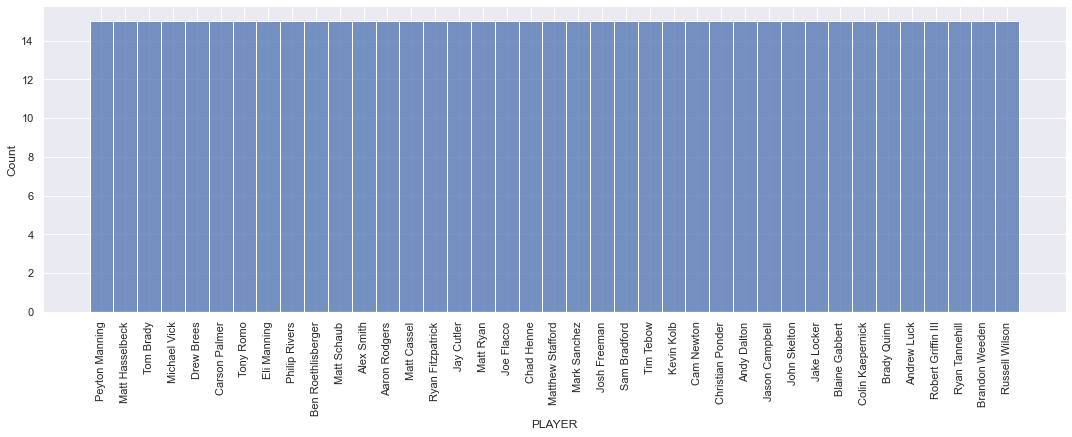

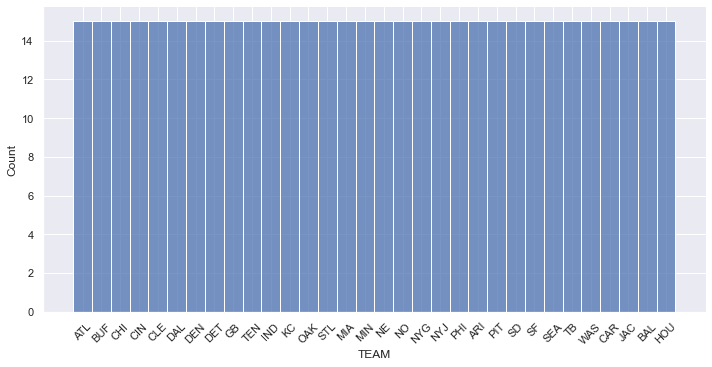

In [14]:
# Provide code and explain your code to make the visualization.

# Import seaborn and set the theme
import seaborn as sns
sns.set_theme()
# Make a very wide plot, listing each QB on the x-axis with their name rotated 90° for readability
# The counts axis will represent the number of games tracked for that QB
bar_QBs = sns.displot(data=QB, x='PLAYER', aspect=3)
display(bar_QBs.set_xticklabels(rotation=90))

# Make a wide plot, listing each D/ST on the x-axis with their name rotated 45° for readability
# The counts axis will represent the number of games tracked for that D/ST
bar_DSTs = sns.displot(data=DST, x='TEAM', aspect=2)
display(bar_DSTs.set_xticklabels(rotation=45))


#### Interpret the visualization: compare it to the "describe" function output from Section 2
This figure confirms what the `describe` function's output only implies; if the most frequently observed quarterback (Peyton Manning) was observed 15 times, and there are 39 unique quarterbacks and 585 total samples, then each quarterback must have 585/39 = 15 observations. 
#### Explain what insight into the data you can make with the visualization. 
All quarterbacks in the model were included for all weeks, regardless of whether or not they were projected to play.
#### Describe how your visualization relates to one of the hypotheses or figures from the paper.
If the authors were trying to evaluate how good their model was at predicting fantasy points scored, weeks where a player was injured (and thus would have been projected to score 0 points)
are just free wins for the model, and would artificially boost any measure of how good the model was at predicting fantasy points

## Section 3: Figure 2 (Actual Fantasy Points Scored)
#### Describe what kind of visualization you want to make.
I would like to make a histogram of how many fantasy points are scored for QBs and D/STs.
#### Why is this appropriate for this feature and data set?
This plot is appropriate because fantasy points are a numerical metric that can be divided up into bins to determine how good (or bad) a performance was, relative to the average
#### How will the visualization provide insight into the data?
This figure will provide a baseline for what a `good` fantasy game was for each position in 2012, which will help us qualitatively evaluate the model's projections
- For example, if the average defense scored 10 fantasy points, and most defenses scored less than 15 points, it would be highly unlikely that the model would project a defense to score more than 15 fantasy points

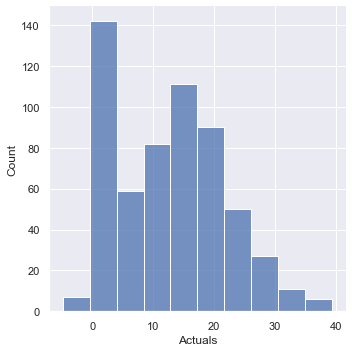

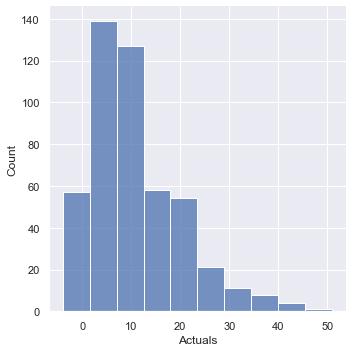

In [15]:
# Provide code and explain your code to make the visualization.
# Create histograms that sort scoring into 10 bins and display them
point_QBs = sns.displot(data=QB, x='Actuals', bins=10)
display(point_QBs)
point_DSTs = sns.displot(data=DST, x='Actuals', bins=10)
display(point_DSTs)

#### Interpret the visualization: compare it to the "describe" function output from Section 2
This figure is a visualization of the `describe` function's output; both QB and D/ST scoring are right-skewed, with 75% of the data for QB and D/ST lying below the half of the maximum score at each position
- For QBs, the maximum score (from the describe output) was **39.4** fantasy points. The 75th percentile score was **18.86** fantasy points
- For D/STs, the maximum score (from the describe output) was **51** fantasy points. The 75th percentile score was **15** fantasy points 
#### Explain what insight into the data you can make with the visualization. 
Quarterback fantasy point scoring follows more of a Normal distribution (plus a bunch of 0 scores for weeks where those QBs didn't play). D/ST fantasy point scoring, however, is truly right-skewed. The majority of fantasy defenses score below ~12 fantasy points.
#### Describe how your visualization relates to one of the hypotheses or figures from the paper.
Knowing how fantasy point scoring is distributed for each position can help the authors find appropriate models to predict future fantasy point scoring at each position. It's also helpful to know that the fantasy points scored distribution is different for different positions. That suggests that a different model should probably be used to project each position's future fantasy points.

## Question 1: Is there a relationship between quarterback fantasy points scored and team defense fantasy points scored on the same team?
In other words, does a quarterback who scores more fantasy points (and presumably more real NFL points for his team) have any effect on how their team's defense performs?
- **What is your hypothesis?**: I hypothesize that quarterback fantasy football scoring will have no effect on team defense fantasy point scoring. The quarterback plays on the offensive side of the ball, and so how the QB performs should not statistically influence how his defense performs, since they are not on the football field at the same time (teams take turns switching off playing offense/defense)
- **How does this relate to the researcher's question?**: This question is related to the researcher's question because they were trying to use a model to predict the number of fantasy points a quarterback/team defense might score. If quarterback fantasy point scoring was a strong predictor of team defensive scoring (or vice versa), the researchers could've added this to their model.
- **How does this relate to Part 1?**: This question is a more specific form of the research question I asked in part 1. I'm examining this question for quarterbacks/team defenses from the same team.
- **Why use this data?**: This data provides information about the team QBs/DSTs belonged to, as well as how many fantasy points they scored for each week of the NFL season.
- **Which features will you be using?**: I will be using `fantasy points scored`, `team`, and `player` to complete this assignment
- **How many observations are there for each feature?**: There are the same number of observations for each feature, which is 15 * the number of players at that position.
    - For QBs: 585
    - For DSTs: 480
    - Since the reason there are more quarterbacks is because some teams played multiple quarterbacks, I will simplify this analysis by combining the QBs that played for an individual team and treating them as if they were 1 QB

In [16]:
# Code from earlier sections to import and clean the dataset

# import packages and dataset
import pandas as pd

# These were imported for each fantasy football position type (QB or DST)
QB = pd.read_excel('../Data/Accuscore Evaluation.xlsx', sheet_name='QB Projections')
DST = pd.read_excel('../Data/Accuscore Evaluation.xlsx', sheet_name= 'DST Projections')

# Remove duplicate columns (PLAYERID/ESPNID is simply an alias for PLAYER)
QB = QB.drop(['PLAYERID', 1], axis=1)
# Since defenses are played per team, as long as we have the TEAM data, we know what the name of the player is
DST = DST.drop(['ESPNID', 'PLAYER'], axis=1)
# Rename ORDER column to WEEK for clarity (since order describes the week of the NFL season)
QB = QB.rename(columns={'ORDER':'WEEK'})
DST = DST.rename(columns={'ORDER':'WEEK'})


# Remove Ben Roethelisberger's and Andrew Luck's bye weeks (Week 4), since the authors forgot to
ben_bye = ((QB['WEEK'] == 4) & (QB['PLAYER'] == 'Ben Roethlisberger')).astype(int).idxmax()
luck_bye = ((QB['WEEK'] == 4) & (QB['PLAYER'] == 'Andrew Luck')).astype(int).idxmax()
QB = QB.drop([ben_bye, luck_bye], axis=0)

In [17]:
# Get a list of all of the NFL teams as a set
teams = set(QB['TEAM'])
# Get a list of the weeks of the NFL season as a set (we'll need these to figure out how many points the QBs for a team scored in a given week)
weeks = set(QB['WEEK'])
display(teams, weeks)

{'ARI',
 'ATL',
 'BAL',
 'BUF',
 'CAR',
 'CHI',
 'CIN',
 'CLE',
 'DAL',
 'DEN',
 'DET',
 'GB',
 'HOU',
 'IND',
 'JAC',
 'KC',
 'MIA',
 'MIN',
 'NE',
 'NO',
 'NYG',
 'NYJ',
 'OAK',
 'PHI',
 'PIT',
 'SD',
 'SEA',
 'SF',
 'STL',
 'TB',
 'TEN',
 'WAS'}

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16}

In [18]:
# Additional cleaning to be able to make this plot
import seaborn as sns
# Create a df where rows will be team-week pairs, and columns will be QB and DST scoring
team_scoring_df = pd.DataFrame()
# For each NFL team
for team in teams:
    # For each week of the NFL season from 1-16
    for week in weeks:
        # Figure out how many fantasy points that team's quarterback(s) scored that week, and add it to the df with the row as a team-week pair, and the column as 'QB Scoring'
        team_scoring_df.loc[team + '-' + str(week), 'QB Scoring'] = QB.loc[(QB['WEEK'] == week) & (QB['TEAM'] == team), 'Actuals'].sum()
        # Add however many points the team's defense unit scored to the df, and add it to the df with the row as a team-week pair, and the column as 'DST Scoring'
        team_scoring_df.loc[team + '-' + str(week), 'DST Scoring'] = DST.loc[(DST['WEEK'] == week) & (DST['TEAM'] == team), 'Actuals'].sum()

## Rationale for plot
- **What type of plot are you making?**: I am making a regression (reg) plot, which consists of a scatterplot and a regression line
- **Why will this plot give you insight?**: I'm trying to model a potential linear relationship between QB fantasy points scored and DST fantasy points scored.
    - This visualization is purpose-built for visualizing potential linear relationships
- **What do you expect to see?**: Since I expected there to be no relationship, I would expect to see random scatter with a nearly horizontal trendline of QB fantasy point scoring vs. DST fantasy point scoring.
- **How will the result inform your hypothesis?**: If the scatter of the plot does not look like it follows a pattern, and the regression line looks horizontal, there will not be enough evidence to reject my hypothesis. Otherwise, I will have to reject my hypothesis and conclude that there is a linear relationship between QB scoring and DST scoring for the same team.

<AxesSubplot:xlabel='QB Scoring', ylabel='DST Scoring'>

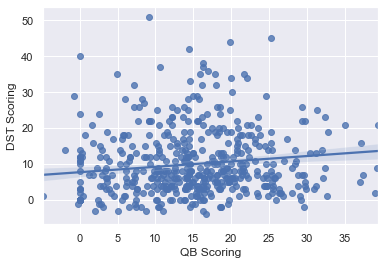

In [19]:
# Plot
sns.regplot(data=team_scoring_df, x='QB Scoring', y='DST Scoring')

### Plot interpretation
- I can conclude that there is not a significant linear relationship between QB fantasy point scoring and DST fantasy point scoring on the same team. QB scoring would not be a good predictor of DST scoring, and vice versa

### Model explanation
- **What feature(s) are you modeling and why is this model appropriate for that?**: I am modeling a linear relationship between QB fantasy point scoring and DST fantasy point scoring separated by teams. Points will be a (QB fpoints scored, DST fpoints scored) XY pair. A linear model is appropriate as a way to determine whether a significant relationship exists between these two variables because it is easily statistically testable.
- **What other feature(s) are used in the model, if any, and why are they included?**: I will be using team and week in this model to separate the points from one another.
- **How will this model inform your hypothesis?**: If the model is significant (p > 0.05), I will reject my hypothesis that there is no relationship between QB and DST scoring
- **What kind of parameters do you expect for your model, based on your visualization?**: I expect a slope, an intercept, and a p-value associated with the intercept.

In [20]:
# Model
import statsmodels.api as sm
# Add a constant to the data (need mx + b, not just mx)
to_model = sm.add_constant(team_scoring_df)
# Create input data (X), which is the constant and QB scoring
X = to_model.loc[:, ['const', 'QB Scoring']]
# Create output data (y), which is the DST scoring
y = to_model['DST Scoring']
# Fit a linear model to the DST vs QB data
model = sm.OLS(y,X).fit()
# Print out a summary of the statistics of the model
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            DST Scoring   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     10.38
Date:                Tue, 13 Dec 2022   Prob (F-statistic):            0.00136
Time:                        15:02:36   Log-Likelihood:                -1861.5
No. Observations:                 512   AIC:                             3727.
Df Residuals:                     510   BIC:                             3735.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.7443      0.779      9.944      0.000       6.214       9.274
QB Scoring     0.1498      0.046      3.222      0.001       0.058       0.241
==============================================================================
Omnibus:                      110.619   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              196.954
Skew:                           1.260   Prob(JB):                     1.71e-43
Kurtosis:                       4.696   Cond. No.                         32.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Model interpretation
- **What can we conclude about the parameters of the model?**: DST fantasy point scoring is positively correlated to QB fantasy point scoring. For every 1 fantasy point the QB scores, a defense can be expected to score ~0.15 fantasy points
- **How certain/uncertain are we about them?**: Based on the probability from the t-test (P > |t|), we are 99.9% confident that there is a significant, linear relationship between DST scoring and QB scoring.
- **What conclusions can we make about the research question based on the model results?**: QB scoring is predictive of DST scoring, and should be added to the authors' model to help improve their projections. One way this could be done is by keeping track of how many points a quarterback scores, on average, and using this linear model to add a flat amount of points to the DST projection for his team.


## Question 2: Do more top-8 QB weekly finishes result in a higher average fantasy points scored for QBs?
- **What is your hypothesis?**: I hypothesize that there will be a linear relationship, but it will not be very strong
- **How does this relate to the researcher's question?**: This question is more relevant for fantasy football managers, because in a typical 12-team fantasy league there are only 12 quarterbacks in fantasy starting lineups each week. Knowing that a wide (or narrow) % of QBs will finish with at least one top-8 week (a fantasy-relevant week) allows players to make informed decisions about how to value the QB position (is it replaceable? will lots of quarterbacks score well at least once? Then it should be valued below more scarce positions. Otherwise, it should be highly valued.)
- **How does this relate to Part 1?**: This is asking a similar style of question, where the goal is to gain insight into what factors produce consistent, high-scoring fantasy football players
- **Why use this data?**: This data provides information about the how many fantasy points QBs scored every week
- **Which features will you be using?**: I will be using `fantasy points scored` and `player` to answer this question
- **How many observations are there for each feature?**: There are the same number of observations for each feature, which is 15 * the number of players at the QB position (585)

In [21]:
# Code from earlier sections to import and clean the dataset

# import packages and dataset
import pandas as pd

# These were imported for each fantasy football position type (QB or DST)
QB = pd.read_excel('../Data/Accuscore Evaluation.xlsx', sheet_name='QB Projections')

# Remove duplicate columns (PLAYERID/ESPNID is simply an alias for PLAYER)
QB = QB.drop(['PLAYERID', 1], axis=1)
# Rename ORDER column to WEEK for clarity (since order describes the week of the NFL season)
QB = QB.rename(columns={'ORDER':'WEEK'})


# Remove Ben Roethelisberger's and Andrew Luck's bye weeks (Week 4), since the authors forgot to
ben_bye = ((QB['WEEK'] == 4) & (QB['PLAYER'] == 'Ben Roethlisberger')).astype(int).idxmax()
luck_bye = ((QB['WEEK'] == 4) & (QB['PLAYER'] == 'Andrew Luck')).astype(int).idxmax()
QB = QB.drop([ben_bye, luck_bye], axis=0)

In [22]:
# Additional cleaning to be able to make this plot
import seaborn as sns
# Create a df where rows will be players, and columns will be number of weeks in the top 8
qb_scoring_df = pd.DataFrame()
# For each week of the NFL season
for week in weeks:
    # Sort QBs for the week by how many fantasy points they scored (high to low), and take the top 8
    top8 = QB[QB['WEEK'] == week].sort_values('Actuals', ascending=False)[0:7]
    # for each player
    for player in top8['PLAYER']:
        # If they've already had a top 8 week
        if player in qb_scoring_df.index:
            # Add 1 to their total
            qb_scoring_df.loc[player, 'Occurences'] += 1
        else:
            # This is their first week in the top 8
            qb_scoring_df.loc[player, 'Occurences'] = 1

print('QBs with at least 1 top 8 week:', qb_scoring_df.shape[0])

# Add everyone without a week in the top 8 to the df (for visualization purposes)
for player in set(QB['PLAYER']):
    if player in qb_scoring_df.index:
        # Do nothing, they already made it in
        pass
    else:
        # This is their first week in the top 8
        qb_scoring_df.loc[player, 'Occurences'] = 0

# Add mean fpts scored for each player
qb_scoring_df = qb_scoring_df.sort_index(axis=0)
qb_scoring_df['Average'] = QB.groupby('PLAYER')['Actuals'].mean()

QBs with at least 1 top 8 week: 30


## Rationale for plot
- **What type of plot are you making?**: I am making 2 histograms
- **Why will this plot give you insight?**: I'm trying to visualize the distribution of how many top 8 weeks a quarterback can be expected to have, on average
- **What do you expect to see?**: I expect to see most quarterbacks between 0 and 2 occurences, with fewer and fewer quarterbacks as the number of weeks in the top 8 increases
- **How will the result inform your hypothesis?**: I will see if QB scoring follows the distribution I would expect, and whether average fpts scored follows a similar distribution

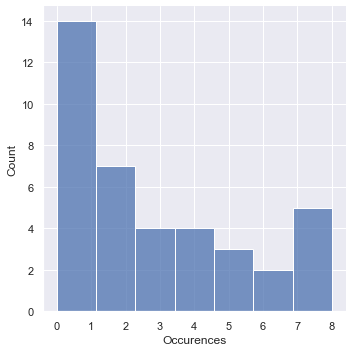

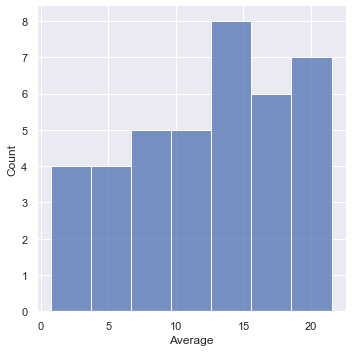

In [23]:
# Plot
sns.displot(data=qb_scoring_df, x='Occurences')
sns.displot(data=qb_scoring_df, x='Average')

### Plot interpretation
- The majority of quarterbacks (over 20) have 1 or fewer weeks in the top-8 quarterbacks. Of the remaining 19 NFL quarterbacks, there seems to be an even distribution of weeks in the top 8
- Fantasy point average does not follow a similar distribution to top-8 QB weeks

### Model explanation
- **What feature(s) are you modeling and why is this model appropriate for that?**: I am modeling average fantasy points scored and weeks in the top 8 quarterbacks using a linear model. This model will test if there is a relationship between average fantasy points scored and weeks in the top 8 quarterbacks. Intuitively, these two should have a relationship, but there may be quarterbacks who score in the top-12 or top-15 on a weekly basis, and finish the season in the top-10 (as a fantasy-relevant QB) by sheer volume/stat accumulation because of their consistency.
- **What other feature(s) are used in the model, if any, and why are they included?**: Average fantasy points scored for each player
- **How will this model inform your hypothesis?**: This model will add some context to my hypothesis. Does having less top-8 finishes necessarily mean a player is a "worse" fantasy QB?
- **What kind of parameters do you expect for your model, based on your visualization?**: I expect a slope, an intercept, and a p-value associated with the intercept.

In [24]:
# Model
import statsmodels.api as sm

# Add a constant to the data (need mx + b, not just mx)
to_model = sm.add_constant(qb_scoring_df)
# Create input data (X), which is the constant and QB scoring
X = to_model.loc[:, ['const', 'Occurences']]
# Create output data (y), which is the DST scoring
y = to_model['Average']
# Fit a linear model to the DST vs QB data
model = sm.OLS(y,X).fit()
# Print out a summary of the statistics of the model
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Average   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     142.4
Date:                Tue, 13 Dec 2022   Prob (F-statistic):           3.02e-14
Time:                        15:02:48   Log-Likelihood:                -93.941
No. Observations:                  39   AIC:                             191.9
Df Residuals:                      37   BIC:                             195.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.5008      0.670      9.701      0.000       5.143       7.859
Occurences     2.0916      0.175     11.932      0.000       1.736       2.447
==============================================================================
Omnibus:                        0.384   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.825   Jarque-Bera (JB):                0.537
Skew:                          -0.004   Prob(JB):                        0.765
Kurtosis:                       2.425   Cond. No.                         6.02
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Model interpretation
- **What can we conclude about the parameters of the model?**: Number of top-8 weeks is predictive of fantasy point average for QBs. For each top-8 week, the QB's average points scored increases by 2 points
- **How certain/uncertain are we about them?**: Based on the probability from the t-test (P > |t|), we are nearly 100% confident that there is a significant, linear relationship between top-8 scoring weeks and QB scoring.
- **What conclusions can we make about the research question based on the model results?**: QBs with more top-8 weeks tend to have a higher average scoring. If a QB scores highly in 1 or 2 weeks, it's more likely that he will continue to score highly.


# Part 4

## Question 1: Is there a relationship between quarterback fantasy points scored and team defense fantasy points scored on the same team?
In other words, does a quarterback who scores more fantasy points (and presumably more real NFL points for his team) have any effect on how their team's defense performs?
- **What is your hypothesis?**: I hypothesize that quarterback fantasy football scoring will have no effect on team defense fantasy point scoring. The quarterback plays on the offensive side of the ball, and so how the QB performs should not statistically influence how his defense performs, since they are not on the football field at the same time (teams take turns switching off playing offense/defense)
- **How does this relate to the researcher's question?**: This question is related to the researcher's question because they were trying to use a model to predict the number of fantasy points a quarterback/team defense might score. If quarterback fantasy point scoring was a strong predictor of team defensive scoring (or vice versa), the researchers could've added this to their model.
- **How does this relate to Part 1?**: This question is a more specific form of the research question I asked in part 1. I'm examining this question for quarterbacks/team defenses from the same team.
- **Why use this data?**: This data provides information about the team QBs/DSTs belonged to, as well as how many fantasy points they scored for each week of the NFL season.
- **Which features will you be using?**: I will be using `fantasy points scored`, `team`, and `player` to complete this assignment
- **How many observations are there for each feature?**: There are the same number of observations for each feature, which is 15 * the number of players at that position.
    - For QBs: 585
    - For DSTs: 480
    - Since the reason there are more quarterbacks is because some teams played multiple quarterbacks, I will simplify this analysis by combining the QBs that played for an individual team and treating them as if they were 1 QB

In [73]:
# Code from earlier sections to import and clean the dataset

# import packages and dataset
import pandas as pd

# These were imported for each fantasy football position type (QB or DST)
QB = pd.read_excel('../Data/Accuscore Evaluation.xlsx', sheet_name='QB Projections')
DST = pd.read_excel('../Data/Accuscore Evaluation.xlsx', sheet_name= 'DST Projections')

# Remove duplicate columns (PLAYERID/ESPNID is simply an alias for PLAYER)
QB = QB.drop(['PLAYERID', 1], axis=1)
# Since defenses are played per team, as long as we have the TEAM data, we know what the name of the player is
DST = DST.drop(['ESPNID', 'PLAYER'], axis=1)
# Rename ORDER column to WEEK for clarity (since order describes the week of the NFL season)
QB = QB.rename(columns={'ORDER':'WEEK'})
DST = DST.rename(columns={'ORDER':'WEEK'})


# Remove Ben Roethelisberger's and Andrew Luck's bye weeks (Week 4), since the authors forgot to
ben_bye = ((QB['WEEK'] == 4) & (QB['PLAYER'] == 'Ben Roethlisberger')).astype(int).idxmax()
luck_bye = ((QB['WEEK'] == 4) & (QB['PLAYER'] == 'Andrew Luck')).astype(int).idxmax()
QB = QB.drop([ben_bye, luck_bye], axis=0)
# Get a list of all of the NFL teams as a set
teams = set(QB['TEAM'])
# Get a list of the weeks of the NFL season as a set (we'll need these to figure out how many points the QBs for a team scored in a given week)
weeks = set(QB['WEEK'])
display(teams, weeks)
# Additional cleaning to be able to make this plot
import seaborn as sns
# Create a df where rows will be team-week pairs, and columns will be QB and DST scoring
team_scoring_df = pd.DataFrame()
# For each NFL team
for team in teams:
    # For each week of the NFL season from 1-16
    for week in weeks:
        # Figure out how many fantasy points that team's quarterback(s) scored that week, and add it to the df with the row as a team-week pair, and the column as 'QB Scoring'
        team_scoring_df.loc[team + '-' + str(week), 'QB Scoring'] = QB.loc[(QB['WEEK'] == week) & (QB['TEAM'] == team), 'Actuals'].sum()
        # Add however many points the team's defense unit scored to the df, and add it to the df with the row as a team-week pair, and the column as 'DST Scoring'
        team_scoring_df.loc[team + '-' + str(week), 'DST Scoring'] = DST.loc[(DST['WEEK'] == week) & (DST['TEAM'] == team), 'Actuals'].sum()
        # Add the week of the NFL season so we can use it in the weeks_and_dst_scoring model
        team_scoring_df.loc[team + '-' + str(week), 'Week'] = week
        # Add the team so that we can use it in the dst_top8_model in Question 2 (model 6)
        team_scoring_df.loc[team + '-' + str(week), 'Team'] = team

{'ARI',
 'ATL',
 'BAL',
 'BUF',
 'CAR',
 'CHI',
 'CIN',
 'CLE',
 'DAL',
 'DEN',
 'DET',
 'GB',
 'HOU',
 'IND',
 'JAC',
 'KC',
 'MIA',
 'MIN',
 'NE',
 'NO',
 'NYG',
 'NYJ',
 'OAK',
 'PHI',
 'PIT',
 'SD',
 'SEA',
 'SF',
 'STL',
 'TB',
 'TEN',
 'WAS'}

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16}

In [74]:
# Model 1 - Same team, QB-defense pairs
import statsmodels.api as sm
# Add a constant to the data (need mx + b, not just mx)
to_model = sm.add_constant(team_scoring_df)
# Create input data (X), which is the constant and DST scoring
X = to_model.loc[:, ['const', 'DST Scoring']]
# Create output data (y), which is the QB scoring
y = to_model['QB Scoring']
# Fit a linear model to the QB vs DST data
qb_scoring_model = sm.OLS(y,X).fit()
# Print out a summary of the statistics of the model
qb_scoring_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             QB Scoring   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     10.38
Date:                Tue, 13 Dec 2022   Prob (F-statistic):            0.00136
Time:                        16:26:18   Log-Likelihood:                -1831.4
No. Observations:                 512   AIC:                             3667.
Df Residuals:                     510   BIC:                             3675.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          12.9742      0.560     23.161      0.000      11.874      14.075
DST Scoring     0.1332      0.041      3.222      0.001       0.052       0.214
==============================================================================
Omnibus:                        6.533   Durbin-Watson:                   1.663
Prob(Omnibus):                  0.038   Jarque-Bera (JB):                6.073
Skew:                           0.215   Prob(JB):                       0.0480
Kurtosis:                       2.685   Cond. No.                         19.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Model interpretation
- **What can we conclude about the parameters of the model?**: DST fantasy point scoring is positively correlated to QB fantasy point scoring.
- **How certain/uncertain are we about them?**: Based on the probability from the t-test (P > |t|), we are 99.9% confident that there is a significant, linear relationship between DST scoring and QB scoring.
- **What conclusions can we make about the research question based on the model results?**: DST scoring is predictive of QB scoring, and should be added to the authors' model to help improve their projections. One way this could be done is by keeping track of how many points a team defense scores, on average, and using this linear model to add a flat amount of points to the QB projection for that team.
- **Explain the model in everyday language**: If the DST scored 0 points, we can expect the QB to have scored, on average, 12.97 fantasy points (the equivalent of 325 passing yards and 0 touchdowns, or 225 yards and 1 touchdown). For every fantasy point that the team's DST scores, the QB's fantasy points scored increases by 0.133

In [75]:
# Model 2 - Is there a relationship between week of the NFL season and QB scoring?
# If so, we can expect our QBs to score more or less fantasy points depending on the time of year
import statsmodels.api as sm
# Add a constant to the data (need mx + b, not just mx)
to_model = sm.add_constant(QB)
# Create input data (X), which is the constant and week of the NFL season
X = to_model.loc[:, ['const', 'WEEK']]
# Create output data (y), which is the QB scoring
y = to_model['Actuals']
# Fit a linear model to the QB vs week data
weeks_model = sm.OLS(y,X).fit()
# Print out a summary of the statistics of the model
weeks_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Actuals   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     2.128
Date:                Tue, 13 Dec 2022   Prob (F-statistic):              0.145
Time:                        16:26:55   Log-Likelihood:                -2133.6
No. Observations:                 585   AIC:                             4271.
Df Residuals:                     583   BIC:                             4280.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.5214      0.794     17.021      0.000      11.961      15.082
WEEK          -0.1186      0.081     -1.459      0.145      -0.278       0.041
==============================================================================
Omnibus:                       25.271   Durbin-Watson:                   2.162
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.657
Skew:                           0.285   Prob(JB):                     0.000242
Kurtosis:                       2.402   Cond. No.                         20.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Model interpretation
- **What can we conclude about the parameters of the model?**: QB fantasy point scoring is not related to week of the NFL season.
- **How certain/uncertain are we about them?**: Based on the probability from the t-test (P > |t|), we are not confident that there is a significant, linear relationship between QB scoring and week of the NFL season.
- **What conclusions can we make about the research question based on the model results?**: Week of the NFL season is not predictive of QB scoring, and should be kept out of the authors' model.
- **Explain the model in everyday language**: During week 1 (the first week for which we would have data), QBs are predicted to score 13.4 fantasy points (335 yards, 0 TDs or 185 yards, 1 TD). For each subsequent week of the NFL season QBs will score, on average, 0.12 fantasy points less.

In [76]:
qb_scoring_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             QB Scoring   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     10.38
Date:                Tue, 13 Dec 2022   Prob (F-statistic):            0.00136
Time:                        16:26:58   Log-Likelihood:                -1831.4
No. Observations:                 512   AIC:                             3667.
Df Residuals:                     510   BIC:                             3675.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          12.9742      0.560     23.161      0.000      11.874      14.075
DST Scoring     0.1332      0.041      3.222      0.001       0.052       0.214
==============================================================================
Omnibus:                        6.533   Durbin-Watson:                   1.663
Prob(Omnibus):                  0.038   Jarque-Bera (JB):                6.073
Skew:                           0.215   Prob(JB):                       0.0480
Kurtosis:                       2.685   Cond. No.                         19.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [77]:
weeks_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Actuals   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     2.128
Date:                Tue, 13 Dec 2022   Prob (F-statistic):              0.145
Time:                        16:27:01   Log-Likelihood:                -2133.6
No. Observations:                 585   AIC:                             4271.
Df Residuals:                     583   BIC:                             4280.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.5214      0.794     17.021      0.000      11.961      15.082
WEEK          -0.1186      0.081     -1.459      0.145      -0.278       0.041
==============================================================================
Omnibus:                       25.271   Durbin-Watson:                   2.162
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.657
Skew:                           0.285   Prob(JB):                     0.000242
Kurtosis:                       2.402   Cond. No.                         20.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Model comparison
- **Model Metric 1: RMSE**: Based on log-likelihood, the DST scoring model is more likely than the week of the NFL season model
- **Model Metric 2: R-squared**: Based on R-squared, the DST scoring model accounts for slightly more of the variation in QB scoring than the week of the NFL season model

In [78]:
# Model 3 - Modeling QB fpts as a function of week of the NFL season, and defensive fpts scored by the QB's team
import statsmodels.api as sm
# Add a constant to the data (need mx + b, not just mx)
to_model = sm.add_constant(team_scoring_df)
# Create input data (X), which is the constant, DST scoring, and week
X = to_model.loc[:, ['const', 'DST Scoring', 'Week']]
# Create output data (y), which is the QB scoring
y = to_model['QB Scoring']
# Fit a linear model to the QB vs (DST & Week) data
weeks_and_DST_model = sm.OLS(y,X).fit()
# Print out a summary of the statistics of the model
weeks_and_DST_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             QB Scoring   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     6.301
Date:                Tue, 13 Dec 2022   Prob (F-statistic):            0.00198
Time:                        16:27:55   Log-Likelihood:                -1830.3
No. Observations:                 512   AIC:                             3667.
Df Residuals:                     509   BIC:                             3679.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          13.9941      0.887     15.779      0.000      12.252      15.737
DST Scoring     0.1359      0.041      3.289      0.001       0.055       0.217
Week           -0.1232      0.083     -1.482      0.139      -0.286       0.040
==============================================================================
Omnibus:                        6.713   Durbin-Watson:                   1.668
Prob(Omnibus):                  0.035   Jarque-Bera (JB):                6.522
Skew:                           0.240   Prob(JB):                       0.0383
Kurtosis:                       2.724   Cond. No.                         35.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Model interpretation
- **What can we conclude about the parameters of the model?**: DST scoring actually has to 'offset' some of the output that is being added by including 'week' in the model (the coefficient for DST Scoring is higher in this model than it is in the other model, where DST scoring was the only predictor).
- **How certain/uncertain are we about them?**: Based on the probability from the t-test (P > |t|), we are 99.9% confident that there is a significant, linear relationship between DST scoring and QB scoring. We are still not confident (though somehow we are closer to confident) that there is a significant, linear relationship between week of the NFL season and QB scoring.
- **What conclusions can we make about the research question based on the model results?**: Week of the NFL season is not predictive of QB scoring, and should be kept out of the authors' model. It will also skew other elements of the authors' model if it is included, so it is important that it be kept out.
- **Explain the model in everyday language**: For every point that the team's DST scores, the QB's fantasy points scored increases by 0.136. For every week of the NFL season (as it gets later in the season), team defensive scoring decreases by 0.123 fantasy points.

In [80]:
# Model 4 - Modeling QB fpts as a function of defensive points scored by the QB's team, and the QB's projection for that week
# Additional data cleaning needed to make this model (treating QBs from the same team as a single QB)
# We'll use the most up-to-date projection, and take advantage of the fact that the formula for finding the column where the week's projections are stored is (week + 9) i.e. week 1 projections are stored in column 10

# For each team
for team in teams:
    # For each week
    for week in weeks:
        # Add up the projected points of the QBs who play for a particular team and add them to the DF under 'QB Projections'
        team_scoring_df.loc[team + '-' + str(week), 'QB Projections'] = QB.loc[(QB['WEEK'] == week) & (QB['TEAM'] == team), QB.columns[(week + 9)]].sum()

In [81]:
# Create the model
import statsmodels.api as sm
# Add a constant to the data (need mx + b, not just mx)
to_model = sm.add_constant(team_scoring_df)
# Create input data (X), which is the constant, DST scoring, and QB projections
X = to_model.loc[:, ['const', 'DST Scoring', 'QB Projections']]
# Create output data (y), which is the QB scoring
y = to_model['QB Scoring']
# Fit a linear model to the QB scoring vs (DST scoring & QB projections) data
qb_projection_DST_scoring_model = sm.OLS(y,X).fit()
# Print out a summary of the statistics of the model
qb_projection_DST_scoring_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             QB Scoring   R-squared:                       0.350
Model:                            OLS   Adj. R-squared:                  0.348
Method:                 Least Squares   F-statistic:                     137.3
Date:                Tue, 13 Dec 2022   Prob (F-statistic):           2.11e-48
Time:                        16:28:47   Log-Likelihood:                -1726.1
No. Observations:                 512   AIC:                             3458.
Df Residuals:                     509   BIC:                             3471.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              1.4629      0.849      1.724      0.085      -0.204       3.130
DST Scoring        0.0302      0.034      0.880      0.379      -0.037       0.098
QB Projections     0.9096      0.057     16.090      0.000       0.799       1.021
==============================================================================
Omnibus:                       10.785   Durbin-Watson:                   1.900
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               11.075
Skew:                           0.314   Prob(JB):                      0.00394
Kurtosis:                       3.353   Cond. No.                         51.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Model interpretation
- **What can we conclude about the parameters of the model?**: QB fantasy point projections are more predictive of QB fantasy point scoring than DST fantasy point scoring (and/or they co-vary).
- **How certain/uncertain are we about them?**: Based on the probability from the t-test (P > |t|), we are 100% confident that there is a significant, linear relationship between QB projections and QB scoring. We are not as confident that there is a significant, linear relationship between DST scoring and QB scoring.
- **What conclusions can we make about the research question based on the model results?**: The authors' projection model performs well, outperforming the single best predictor that we found in our own study. It is possible that DST scoring is already a part of their model. We also learn that the authors' projections, on average, overestimate the scoring output of the QB position.
- **Explain the model in everyday language**: For every point that the team's DST scores, the QB's fantasy points scored increases by 0.03 (the equivalent of 1 passing yard). In contrast, for every point a quarterback is projected to score, they typically score 0.91 of those points.

In [82]:
weeks_and_DST_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             QB Scoring   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     6.301
Date:                Tue, 13 Dec 2022   Prob (F-statistic):            0.00198
Time:                        16:28:55   Log-Likelihood:                -1830.3
No. Observations:                 512   AIC:                             3667.
Df Residuals:                     509   BIC:                             3679.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          13.9941      0.887     15.779      0.000      12.252      15.737
DST Scoring     0.1359      0.041      3.289      0.001       0.055       0.217
Week           -0.1232      0.083     -1.482      0.139      -0.286       0.040
==============================================================================
Omnibus:                        6.713   Durbin-Watson:                   1.668
Prob(Omnibus):                  0.035   Jarque-Bera (JB):                6.522
Skew:                           0.240   Prob(JB):                       0.0383
Kurtosis:                       2.724   Cond. No.                         35.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [83]:
qb_projection_DST_scoring_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             QB Scoring   R-squared:                       0.350
Model:                            OLS   Adj. R-squared:                  0.348
Method:                 Least Squares   F-statistic:                     137.3
Date:                Tue, 13 Dec 2022   Prob (F-statistic):           2.11e-48
Time:                        16:28:57   Log-Likelihood:                -1726.1
No. Observations:                 512   AIC:                             3458.
Df Residuals:                     509   BIC:                             3471.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              1.4629      0.849      1.724      0.085      -0.204       3.130
DST Scoring        0.0302      0.034      0.880      0.379      -0.037       0.098
QB Projections     0.9096      0.057     16.090      0.000       0.799       1.021
==============================================================================
Omnibus:                       10.785   Durbin-Watson:                   1.900
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               11.075
Skew:                           0.314   Prob(JB):                      0.00394
Kurtosis:                       3.353   Cond. No.                         51.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Model comparison
- **Model Metric 1: Log-Likelihood**: Based on log-likelihood, the QB projections/DST scoring model is more likely than the DST scoring/weeks model
- **Model Metric 2: R-squared**: Based on R-squared, the QB projections/DST scoring model accounts for significantly more of the total variation in points than the DST scoring/weeks model

## Question 2: Do more top-8 quarterback/DST weekly finishes result in a higher average fantasy points scored for QBs?
- **What is your hypothesis?**: I hypothesize that there will be a linear between top-8 finishes at QB or DST (since we found earlier that DST scoring is predictive of QB scoring), but it will not be very strong. Week-to-week scoring at the quarterback position is highly variable, so I would expect that most quarterbacks will have high highs and low lows. In other words, most QBs will finish similarly in terms of how many top-8 finishes they have, but the rest of their weeks will be much lower-scoring for fantasy.
- **How does this relate to the researcher's question?**
    - This question is more relevant for fantasy football managers, because in a typical 12-team fantasy league there are only 12 quarterbacks in fantasy starting lineups each week. Knowing that a wide (or narrow) % of QBs will finish with at least one top-8 week (a fantasy-relevant week) allows players to make informed decisions about how to value the QB position (is it replaceable? will lots of quarterbacks score well at least once? Then it should be valued below more scarce positions. Otherwise, it should be highly valued.).
    
    - Also, knowing whether or not there's a relationship between how a team's defense performs and how their QBs perform could influence which QB a team chooses to start. (Ex: the Philadelphia Eagles defense is performing well, but their QB is not highly ranked. If high D/ST scoring results in high QB scoring (like we saw earlier), it might be good to pick up the Eagles' QB)
- **How does this relate to Part 1?**: This is asking a similar style of question, where the goal is to gain insight into what factors produce consistent, high-scoring fantasy football QBs
- **Why use this data?**: This data provides information about the how many fantasy points QBs  and DSTs scored every week, as well as the teams that they played for
- **Which features will you be using?**: I will be using `fantasy points scored`, `team`, and `player` to answer this question
- **How many observations are there for each feature?**: There are:
    - 480 observations for DSTs (32*15)
    - 585 observations for QBs (39*15)
    - As before, since there are more observations for QBs, I will treat each team's QBs as if they were one, combined QB to simplify the analysis

In [64]:
# Code from earlier sections to import and clean the dataset

# import packages and dataset
import pandas as pd

# These were imported for each fantasy football position type (QB or DST)
QB = pd.read_excel('../Data/Accuscore Evaluation.xlsx', sheet_name='QB Projections')

# Remove duplicate columns (PLAYERID/ESPNID is simply an alias for PLAYER)
QB = QB.drop(['PLAYERID', 1], axis=1)
# Rename ORDER column to WEEK for clarity (since order describes the week of the NFL season)
QB = QB.rename(columns={'ORDER':'WEEK'})


# Remove Ben Roethelisberger's and Andrew Luck's bye weeks (Week 4), since the authors forgot to
ben_bye = ((QB['WEEK'] == 4) & (QB['PLAYER'] == 'Ben Roethlisberger')).astype(int).idxmax()
luck_bye = ((QB['WEEK'] == 4) & (QB['PLAYER'] == 'Andrew Luck')).astype(int).idxmax()
QB = QB.drop([ben_bye, luck_bye], axis=0)

In [84]:
# Additional cleaning to be able to make this plot
# Create a df where rows will be teams, and columns will be number of weeks where that team's QBs combined to score in the top 8
qb_scoring_df = pd.DataFrame()
# For each week of the NFL season
for week in weeks:
    # Sort QBs for the week by how many fantasy points they scored (high to low), and take the top 8
    top8 = QB[QB['WEEK'] == week].sort_values('Actuals', ascending=False)[0:7]
    # for each team
    for team in top8['TEAM']:
        # If they've already had a top 8 week
        if team in qb_scoring_df.index:
            # Add 1 to their total
            qb_scoring_df.loc[team, 'Occurences'] += 1
        else:
            # This is their first week in the top 8
            qb_scoring_df.loc[team, 'Occurences'] = 1

print('Teams with a QB with at least 1 top 8 week:', qb_scoring_df.shape[0])

# Add everyone without a week in the top 8 to the df (for visualization purposes)
for team in teams:
    if team in qb_scoring_df.index:
        # Do nothing, they already made it in
        pass
    else:
        # They didn't ever make it into the top 8
        qb_scoring_df.loc[team, 'Occurences'] = 0

# Add mean fpts scored for each team's QBs from the team_scoring_df
qb_scoring_df = qb_scoring_df.sort_index(axis=0)
for team in teams:
    qb_scoring_df.loc[team, 'Average'] = team_scoring_df.loc[(team_scoring_df['Team'] == team), 'QB Scoring'].mean()

Teams with a QB with at least 1 top 8 week: 29


In [85]:
# Model 5 - QB points based on top-8 QB finishes
import statsmodels.api as sm

# Add a constant to the data (need mx + b, not just mx)
to_model = sm.add_constant(qb_scoring_df)
# Create input data (X), which is the constant and QB top-8 finshes
X = to_model.loc[:, ['const', 'Occurences']]
# Create output data (y), which is the QB average scoring
y = to_model['Average']
# Fit a linear model to the Average vs Occurences data
qb_top_8_model = sm.OLS(y,X).fit()
# Print out a summary of the statistics of the model
qb_top_8_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Average   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     113.5
Date:                Tue, 13 Dec 2022   Prob (F-statistic):           1.02e-11
Time:                        16:29:48   Log-Likelihood:                -61.782
No. Observations:                  32   AIC:                             127.6
Df Residuals:                      30   BIC:                             130.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.5798      0.537     17.843      0.000       8.483      10.676
Occurences     1.3459      0.126     10.654      0.000       1.088       1.604
==============================================================================
Omnibus:                        2.481   Durbin-Watson:                   2.270
Prob(Omnibus):                  0.289   Jarque-Bera (JB):                1.279
Skew:                          -0.025   Prob(JB):                        0.527
Kurtosis:                       2.022   Cond. No.                         7.78
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Model interpretation
- **What can we conclude about the parameters of the model?**: Number of top-8 weeks is predictive of fantasy point average for QBs. For each top-8 week, the team's QBs' average points scored increases by 1.35 points
- **How certain/uncertain are we about them?**: Based on the probability from the t-test (P > |t|), we are nearly 100% confident that there is a significant, linear relationship between top-8 scoring weeks and QB scoring.
- **What conclusions can we make about the research question based on the model results?**: Teams with QBs with more top-8 weeks tend to have a higher average scoring. If a team scores highly in 1 or 2 weeks, it's more likely that they will continue to score highly.
- **Explain the model in everyday language**: A QB with 0 finishes in the top-8 QBs will average 9.6 fantasy points (the equivalent of 240 passing yards and 0 touchdowns, or 140 passing yards and 1 touchdown). For each top-8 QB peformance, the QB's average fantasy points scored increases by 1.35 fantasy points (About 30 passing yards).

In [68]:
# Model 6 - QB fantasy points based on DST top-8 weeks
# Additional cleaning to be able to make this model
# Create a df where rows will be teams and the columns will be number of weeks that the team's DST was in the top 8, and the team's average fantasy points scored at QB
dst_scoring_df = pd.DataFrame()
# For each week of the NFL season
for week in weeks:
    # Sort DSTs for the week by how many fantasy points they scored (high to low), and take the top 8
    top8 = DST[DST['WEEK'] == week].sort_values('Actuals', ascending=False)[0:7]
    # for each team
    for team in top8['TEAM']:
        # If they've already had a top 8 week
        if team in dst_scoring_df.index:
            # Add 1 to their total
            dst_scoring_df.loc[team, 'Occurences'] += 1
        else:
            # This is their first week in the top 8
            dst_scoring_df.loc[team, 'Occurences'] = 1

print('DSTs with at least 1 top 8 week:', dst_scoring_df.shape[0])

# Add everyone without a week in the top 8 to the df (for modeling purposes)
for team in set(DST['TEAM']):
    if team in dst_scoring_df.index:
        # Do nothing, they already made it in
        pass
    else:
        # They didn't make it in the top 8
        dst_scoring_df.loc[team, 'Occurences'] = 0

# Add mean fpts scored at the QB position for each team
for team in teams:
    dst_scoring_df.loc[team, 'QB Average'] = team_scoring_df.loc[(team_scoring_df['Team'] == team), 'QB Scoring'].mean()

DSTs with at least 1 top 8 week: 29


In [86]:
# Model 6 - Do DST top-8 fantasy weeks have an effect on the team's average QB fantasy points scored?
import statsmodels.api as sm

# Add a constant to the data (need mx + b, not just mx)
to_model = sm.add_constant(dst_scoring_df)
# Create input data (X), which is the constant and DST top-8 finishes
X = to_model.loc[:, ['const', 'Occurences']]
# Create output data (y), which is the QB average points scored
y = to_model['QB Average']
# Fit a linear model to the QB Average vs DST top-8 Occurences data
dst_top_8_model = sm.OLS(y,X).fit()
# Print out a summary of the statistics of the model
dst_top_8_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             QB Average   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.032
Method:                 Least Squares   F-statistic:                   0.03826
Date:                Tue, 13 Dec 2022   Prob (F-statistic):              0.846
Time:                        16:30:14   Log-Likelihood:                -86.805
No. Observations:                  32   AIC:                             177.6
Df Residuals:                      30   BIC:                             180.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.0662      1.326     10.605      0.000      11.357      16.775
Occurences     0.0641      0.328      0.196      0.846      -0.605       0.734
==============================================================================
Omnibus:                        1.892   Durbin-Watson:                   1.812
Prob(Omnibus):                  0.388   Jarque-Bera (JB):                1.124
Skew:                          -0.036   Prob(JB):                        0.570
Kurtosis:                       2.085   Cond. No.                         8.44
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Model interpretation
- **What can we conclude about the parameters of the model?**: Number of top-8 weeks for the team's DST is not predictive of fantasy point average for QBs.
- **How certain/uncertain are we about them?**: Based on the probability from the t-test (P > |t|), we are not confident that there is a significant, linear relationship between top-8 DST scoring weeks and QB average points scored.
- **What conclusions can we make about the research question based on the model results?**: High DST fantasy point scoring is not indicative of high QB fantasy point scoring on the same team. While top-8 weeks within a position are predictive of average points scored, teams scoring well at other fantasy positions does not mean that their QB will also score well
- **Explain the model in everyday language**: A QB with a team with 0 finishes in the top-8 DSTs will average 14.07 fantasy points (the equivalent of 352 passing yards and 0 TDs, 252 yards and 1 TD, or 152 yards and 2 TDs). For each top-8 DST peformance, the QB's average fantasy points scored increases by 0.06 fantasy points (the equivalent of 1.5 passing yards).

In [87]:
qb_top_8_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Average   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     113.5
Date:                Tue, 13 Dec 2022   Prob (F-statistic):           1.02e-11
Time:                        16:30:34   Log-Likelihood:                -61.782
No. Observations:                  32   AIC:                             127.6
Df Residuals:                      30   BIC:                             130.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.5798      0.537     17.843      0.000       8.483      10.676
Occurences     1.3459      0.126     10.654      0.000       1.088       1.604
==============================================================================
Omnibus:                        2.481   Durbin-Watson:                   2.270
Prob(Omnibus):                  0.289   Jarque-Bera (JB):                1.279
Skew:                          -0.025   Prob(JB):                        0.527
Kurtosis:                       2.022   Cond. No.                         7.78
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [88]:
dst_top_8_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             QB Average   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.032
Method:                 Least Squares   F-statistic:                   0.03826
Date:                Tue, 13 Dec 2022   Prob (F-statistic):              0.846
Time:                        16:30:37   Log-Likelihood:                -86.805
No. Observations:                  32   AIC:                             177.6
Df Residuals:                      30   BIC:                             180.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.0662      1.326     10.605      0.000      11.357      16.775
Occurences     0.0641      0.328      0.196      0.846      -0.605       0.734
==============================================================================
Omnibus:                        1.892   Durbin-Watson:                   1.812
Prob(Omnibus):                  0.388   Jarque-Bera (JB):                1.124
Skew:                          -0.036   Prob(JB):                        0.570
Kurtosis:                       2.085   Cond. No.                         8.44
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Model comparison
- **Model Metric 1: Log-Likelihood**: Based on log-likelihood, top-8 QB weeks are more likely to impact QB point average than top-8 DST weeks
- **Model Metric 2: R-squared**: Based on R-squared, top-8 QB weeks account for far more of the variation in QB point average than top-8 DST weeks